# **Capital Investment Selection:**

Problem Source: F. S. Hillier and G. J. Lieberman, "Introduction to Mathematical Programming," 2nd Edition, McGraw-Hill Inc., New York, 1995.

**Problem Statement:**

The board of directors of General Wheels Co. is considering seven large capital
investments. Each investment can be made only once. These investments differ in the estimated long-run profit (net present value) that they will generate as well as in the amount of capital required, as shown by the following table (in units of millions of dollars):

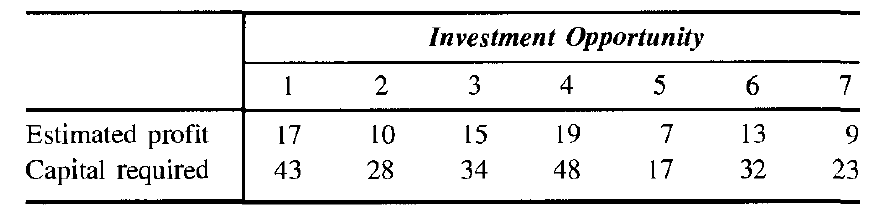

The total amount of capital available for these investments is $\$ 100$ million. Investment opportunities $1$ and $2$ are mutually exclusive, and so are $3$ and $4$. Furthermore, neither $3$ nor $4$ can be undertaken unless one of the first two opportunities is undertaken. There are no such restrictions on investment opportunities $5$, $6$, and $7$. The objective is to select the combination of capital investments that will maximize the total estimated long-run profit (net present value).

**Modeling:**

$x_{i} \ $   binary variables for each investment opportunity

$\\ $

$Objective\ Function:\\ $

$Max\ Z = 17x_{1}+10x_{2}+15x_{3}+19x_{4}+7x_{5}+13x_{6}+9x_{7}$

$\\ $

$Constraints:\\ $

$x_{1}+x_{2}+x_{3}+x_{4}+x_{5}+x_{6}+x_{7} \leq 100$

$x_{1}+x_{2} \leq 1$

$x_{3}+x_{4} \leq 1$

$x_{3} \leq x_{1} + x_{2}$

$x_{4} \leq x_{1} + x_{2}$

## Using Pulp Library

In [1]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

In [2]:
#Defining Variables

x = LpVariable.dicts('x', ((i) for i in range(1,8)), cat='Binary')

In [3]:
#Defining Objective Function

model = LpProblem('model', LpMaximize)

model += 17*x[1]+10*x[2]+15*x[3]+19*x[4]+7*x[5]+13*x[6]+9*x[7]

In [4]:
#Constraints

#Capital Budget Constraint: The total capital used cannot exceed $100 million.
model += x[1]+x[2]+x[3]+x[4]+x[5]+x[6]+x[7] <= 100

#Mutual Exclusivity of Investments 1 and 2
model += x[1]+x[2] <= 1

#Mutual Exclusivity of Investments 3 and 4
model += x[3]+x[4] <= 1

#Dependency of Investments 3 and 4 on Investments 1 or 2
model += x[3] <= x[1]+x[2]
model += x[4] <= x[1]+x[2]

In [5]:
#Model summary

model

model:
MAXIMIZE
17*x_1 + 10*x_2 + 15*x_3 + 19*x_4 + 7*x_5 + 13*x_6 + 9*x_7 + 0
SUBJECT TO
_C1: x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 <= 100

_C2: x_1 + x_2 <= 1

_C3: x_3 + x_4 <= 1

_C4: - x_1 - x_2 + x_3 <= 0

_C5: - x_1 - x_2 + x_4 <= 0

VARIABLES
0 <= x_1 <= 1 Integer
0 <= x_2 <= 1 Integer
0 <= x_3 <= 1 Integer
0 <= x_4 <= 1 Integer
0 <= x_5 <= 1 Integer
0 <= x_6 <= 1 Integer
0 <= x_7 <= 1 Integer

In [6]:
#Solving model

model.solve()
print('Optimal Solution:', pulp.value(model.objective))

Optimal Solution: 65.0


In [7]:
for variables in model.variables():
  print(f'{variables.name}:{variables.varValue}')

x_1:1.0
x_2:0.0
x_3:0.0
x_4:1.0
x_5:1.0
x_6:1.0
x_7:1.0


In [8]:
VNames = []
for variables in model.variables():
  VNames.append(variables.name)

VValue = []
for variables in model.variables():
  VValue.append(np.round(variables.varValue, 2))

data = {'Variables': VNames, 'Value': VValue}
pd.DataFrame(data, index = range(1, len(VValue)+1))

,Variables,Value
1,x_1,1.0
2,x_2,0.0
3,x_3,0.0
4,x_4,1.0
5,x_5,1.0
6,x_6,1.0
7,x_7,1.0


In [9]:
print('Current Status: ', LpStatus[model.status])

Current Status:  Optimal


## Using Pyomo Library

In [10]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

from pyomo.environ import *

In [11]:
model = ConcreteModel()

model.indices = Set(initialize=list(range(1,8)))
model.x = Var(model.indices, domain=Binary)

model.obj = Objective(expr=17*model.x[1]+10*model.x[2]+15*model.x[3]+19*model.x[4]+7*model.x[5]+13*model.x[6]+9*model.x[7], sense=maximize)

model.constraint1 = Constraint(expr=model.x[1]+model.x[2]+model.x[3]+model.x[4]+model.x[5]+model.x[6]+model.x[7] <= 100)
model.constraint2 = Constraint(expr=model.x[1]+model.x[2] <= 1)
model.constraint3 = Constraint(expr=model.x[3]+model.x[4] <= 1)
model.constraint4 = Constraint(expr=model.x[3] <= model.x[1]+model.x[2])
model.constraint5 = Constraint(expr=model.x[4] <= model.x[1]+model.x[2])

SolverFactory('glpk').solve(model)

model.display()

Model unknown

  Variables:
    x : Size=7, Index=indices
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   1.0 :     1 : False : False : Binary

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :  65.0

  Constraints:
    constraint1 : Size=1
        Key  : Lower : Body : Upper
        None :  None :  5.0 : 100.0
    constraint2 : Size=1
        Key  : Lower : Body : Upper
        None :  None :  1.0 :   1.0
    constraint3 : Size=1
        Key  : Lower : Body : Upper
        None :  None :  1.0 :   1.0
    constraint4 : Size=1
     

In [12]:
print("Variable values:")
model.x.pprint()

Variable values:
x : Size=7, Index=indices
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 :   1.0 :     1 : False : False : Binary
      2 :     0 :   0.0 :     1 : False : False : Binary
      3 :     0 :   0.0 :     1 : False : False : Binary
      4 :     0 :   1.0 :     1 : False : False : Binary
      5 :     0 :   1.0 :     1 : False : False : Binary
      6 :     0 :   1.0 :     1 : False : False : Binary
      7 :     0 :   1.0 :     1 : False : False : Binary
